In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# -- load comma separate version of file into numpy array of dimensions (100, 504)
d = pd.read_csv("test.txt", delimiter=",", header=None, skiprows=1).values

In [37]:
# -- split d into 3 segments vertically, to separate the three calo layers
first, second, third = np.split(d, indices_or_sections=[3*96, 3*96 + 12*12], axis=1)

In [38]:
# -- reshape to put them into unravelled, 2D image format
first = first.reshape(-1, 3, 96)
second = second.reshape(-1, 12, 12)
third = third.reshape(-1, 12, 6)

# Check that one event makes sense

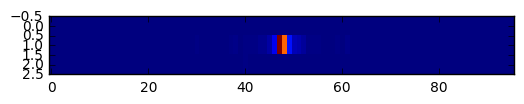

In [30]:
plt.imshow(first[1], aspect=4, interpolation='nearest')
# aspect is needed to make this 3*96 image come out nice

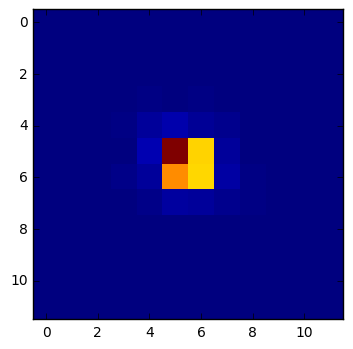

In [40]:
plt.imshow(second[1], interpolation='nearest')

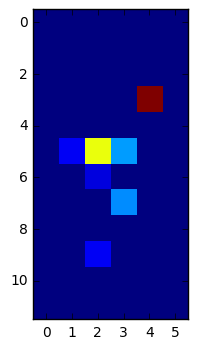

In [41]:
plt.imshow(third[1], interpolation='nearest')
# is this rotated?? is it 12*6 or 6*12?

# Mean Images

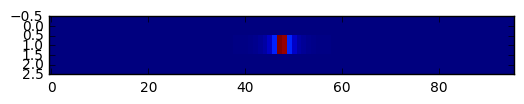

In [43]:
plt.imshow(first.mean(axis=0), aspect=4, interpolation='nearest')

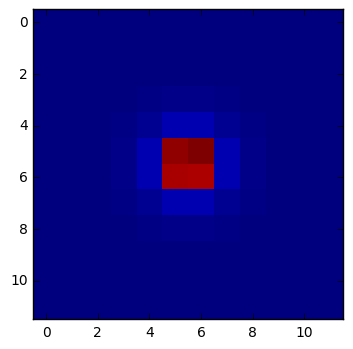

In [46]:
plt.imshow(second.mean(axis=0), interpolation='nearest')

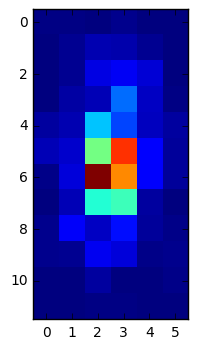

In [47]:
plt.imshow(third.mean(axis=0), interpolation='nearest')

In [49]:
print first.sum(), second.sum(), third.sum()

303907.46014 678551.491794 1006.00020793


pyplot imshow shows equal size pixels. This won't be a problem in the future once we homogenize the pixel sizes across etas, but right now these images are not realistic.

Metrics:
    - depth (categorical? 1, 2, 3?)
    - r^2 (squared transverse distance from particle direction)

r^2 is going to be very easy to calculate once we have a uniform binning scheme across all three calorimeter layers

How should we take into account the depth of each layer? As a separation distance among images?